In [1]:
import numpy as np
import matplotlib as m
import matplotlib.pyplot as plt

### Part 1

In [2]:
# analytical derivatives

# Main Function
def PMfun(M):
    g = 1.4
    np.seterr(divide= 'ignore', invalid='ignore')
    res = ((((g+1)/(g-1))**(1/2))*(np.arctan((((g-1)*((M**2)-1))/(g+1))**(1/2))))-(np.arctan(((M**2)-1)**(1/2)))
    return res

# First derivative
def dPMfun(M):
    g= 1.4
    return ((M*(g-1)*(((g+1)/(g-1))**(1/2)))/((((M**2)*(g-1))+2)*(((((M**2)-1)*(g-1))/(g+1))**(1/2))))-(1/(M*(((M**2)-1)**(1/2))))

# Second Derivative
def d2PMfun(M):
    return ((((-10*(M**6))+(25*(M**4))+(10*(M**2))-25)/(((M**2)*(((M**2)-1)**(3/2)))*(((M**2)+5)**2))))


# First order derivatives

# Central First Derivative
def central(M, PMfun, h):
    return (((PMfun(M+h))-(PMfun(M-h)))/(2*h))

# Forward First Derivative
def forward(M, PMfun, h):
    return (((PMfun(M+h))-(PMfun(M)))/(h))

# Forward2 First Derivative
def forward2(M, PMfun, h):
    return (((-3*PMfun(M))+(4*PMfun(M+h))+(-1*PMfun(M+(2*h))))/(2*h))

# Backward First Derivative
def backward(M, PMfun, h):
    return (((PMfun(M))-(PMfun(M-h)))/(h))


# Second order derivatives

# Central Second Derivative
def centrald2(M, PMfun, h):
    return (((PMfun(M+h))-(2*PMfun(M))+(PMfun(M-h)))/(h**2))

# Forward Second Derivative
def forwardd2(M, PMfun, h):
    return (((PMfun(M))+(-2*PMfun(M+h))+(PMfun(M+(2*h))))/(h**2))

# Forward 2 Second Derivative
def forward2d2(M, PMfun, h):
    return (((2*PMfun(M))+(-5*PMfun(M+h))+(4*PMfun(M+(2*h)))+(-1*PMfun(M+(3*h))))/(h**2))

# Backward Second Derivative
def backwardd2(M, PMfun, h):
    return (((PMfun(M))+(-2*PMfun(M-h))+(PMfun(M-(2*h))))/(h**2))

### Part 2

In [3]:
# Making array to sotre M values
M_vals = np.linspace(1,5,69)

# true values
org_vals = PMfun(M_vals)
d1 = dPMfun(M_vals)
dd2 = d2PMfun(M_vals)

# numerical differences first derivative
cent1 = central(M_vals, PMfun, 0.0001)
for11 = forward(M_vals, PMfun, 0.0001)
for21 = forward2(M_vals, PMfun, 0.0001)

# numerical differences second derivative
cent2 = centrald2(M_vals, PMfun, 0.0001)
for12 = forwardd2(M_vals, PMfun, 0.0001)
for22 = forward2d2(M_vals, PMfun, 0.0001)

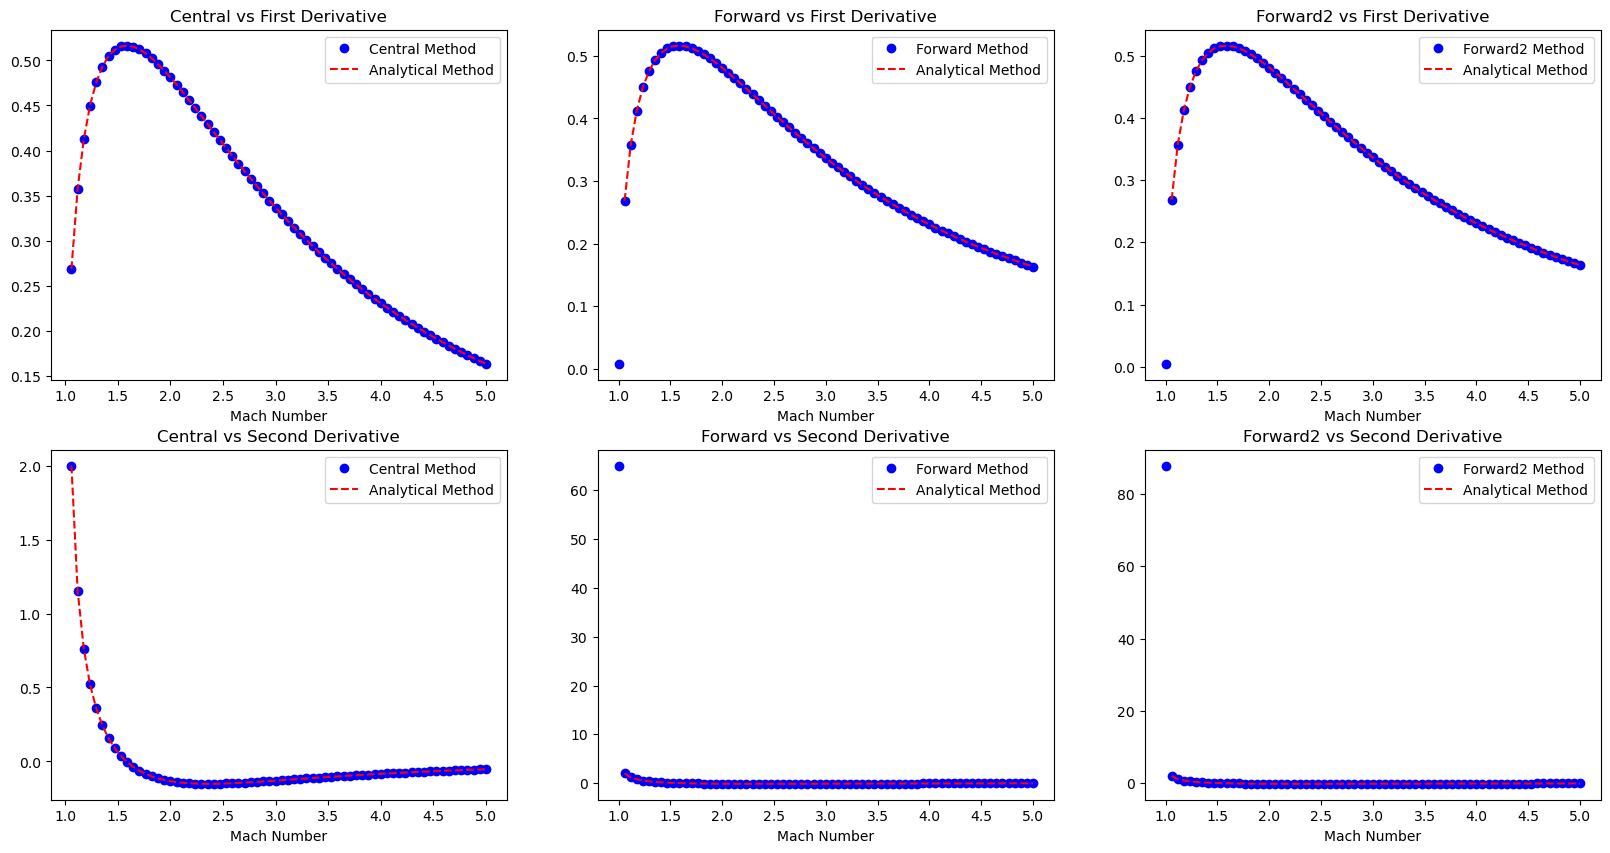

In [4]:
# plotting the graphs

fig, ax = plt.subplots(2,3, figsize = (20,10))
ax[0,0].plot(M_vals, cent1, 'ob', M_vals, d1, '--r')
ax[0,0].set_title('Central vs First Derivative')
ax[0,0].legend(['Central Method','Analytical Method'])
ax[0,0].set_xlabel("Mach Number")
#ax[0,0]

ax[0,1].plot(M_vals, for11, 'ob', M_vals, d1, '--r')
ax[0,1].set_title('Forward vs First Derivative')
ax[0,1].legend(['Forward Method','Analytical Method'])
ax[0,1].set_xlabel("Mach Number")
#ax[0,1]

ax[0,2].plot(M_vals, for21, 'ob', M_vals, d1, '--r')
ax[0,2].set_title('Forward2 vs First Derivative')
ax[0,2].legend(['Forward2 Method','Analytical Method'])
ax[0,2].set_xlabel("Mach Number")
#ax[0,2]

ax[1,0].plot(M_vals, cent2, 'ob', M_vals, dd2, '--r')
ax[1,0].set_title('Central vs Second Derivative')
ax[1,0].legend(['Central Method','Analytical Method'])
ax[1,0].set_xlabel("Mach Number")
#ax[1,0]

ax[1,1].plot(M_vals, for12, 'ob', M_vals, dd2, '--r')
ax[1,1].set_title('Forward vs Second Derivative')
ax[1,1].legend(['Forward Method','Analytical Method'])
ax[1,1].set_xlabel("Mach Number")
#ax[1,1]

ax[1,2].plot(M_vals, for22, 'ob', M_vals, dd2, '--r')
ax[1,2].set_title('Forward2 vs Second Derivative')
ax[1,2].legend(['Forward2 Method','Analytical Method'])
ax[1,2].set_xlabel("Mach Number")
#ax[1,2]

plt.show()

### Part 3

In [5]:
# making array for delta M
h = np.power(10, np.linspace(-1,-16,16))

In [6]:
# making empty lists
cent1 = []
cent2 = []
for11 = []
for12 = []
bac11 = []
bac12 = []

# getting all the error values
for i in h:
    # numerical differences first derivative
    cent1.append(np.log(abs((central(M_vals, PMfun, i))-d1)))
    for11.append(np.log(abs((forward(M_vals, PMfun, i))-d1)))
    bac11.append(np.log(abs((backward(M_vals, PMfun, i))-d1)))

    # numerical differences second derivative
    cent2.append(np.log(abs((centrald2(M_vals, PMfun, i))-dd2)))
    for12.append(np.log(abs((forwardd2(M_vals, PMfun, i))-dd2)))
    bac12.append(np.log(abs((backwardd2(M_vals, PMfun, i))-dd2)))

In [7]:
# getting differnet colors for plotting purposes
c = plt.cm.rainbow(np.linspace(0,1,16))

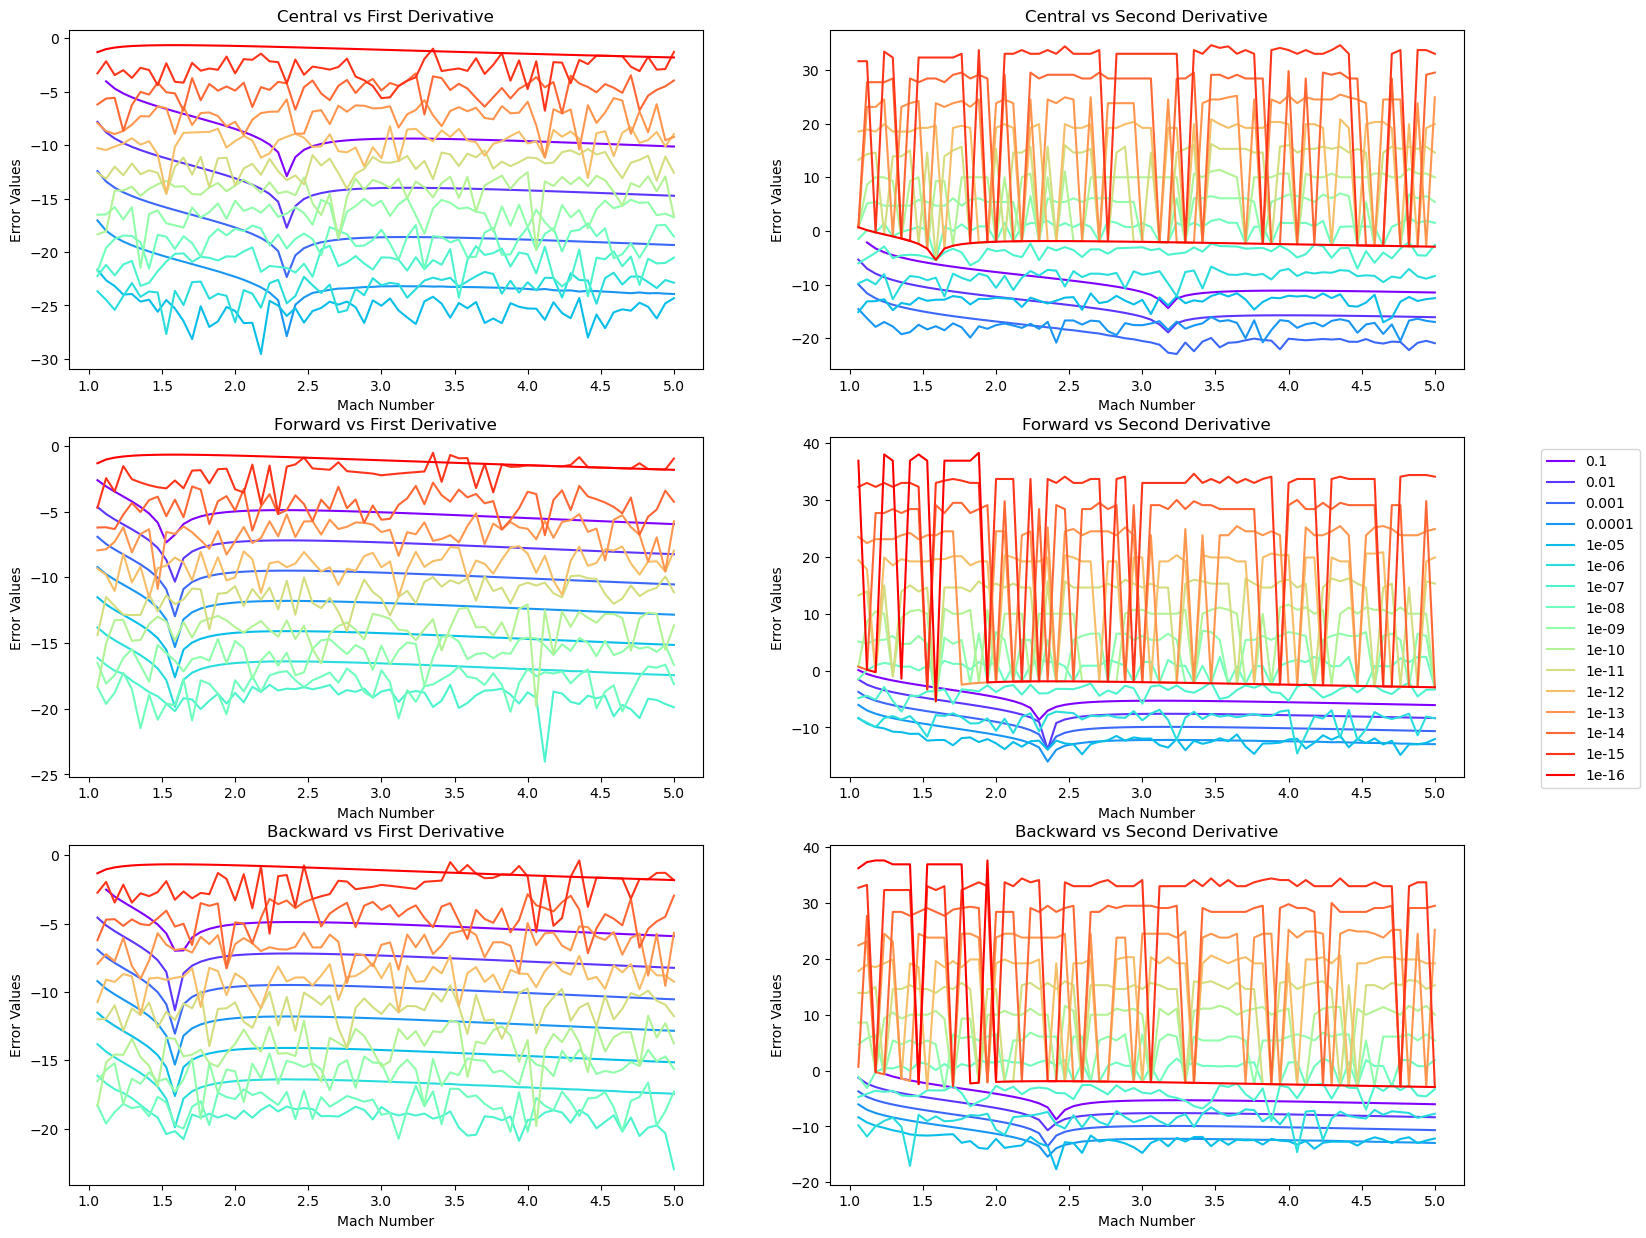

In [8]:
# plotting
fig, ax = plt.subplots(3,2, figsize = (18,15))

ax[0,0].set_title('Central vs First Derivative')
ax[0,0].set_xlabel('Mach Number')
ax[0,0].set_ylabel('Error Values')

ax[1,0].set_title('Forward vs First Derivative')
ax[1,0].set_xlabel('Mach Number')
ax[1,0].set_ylabel('Error Values')

ax[2,0].set_title('Backward vs First Derivative')
ax[2,0].set_xlabel('Mach Number')
ax[2,0].set_ylabel('Error Values')

ax[0,1].set_title('Central vs Second Derivative')
ax[0,1].set_xlabel('Mach Number')
ax[0,1].set_ylabel('Error Values')

ax[1,1].set_title('Forward vs Second Derivative')
ax[1,1].set_xlabel('Mach Number')
ax[1,1].set_ylabel('Error Values')

ax[2,1].set_title('Backward vs Second Derivative')
ax[2,1].set_xlabel('Mach Number')
ax[2,1].set_ylabel('Error Values')

# 
for i in range(0,16):
    ax[0,0].plot(M_vals, cent1[i], linestyle = '-', color = c[i], label = str(h[i]))
    #ax[0,0].set_title('Central vs First Derivative')

    ax[1,0].plot(M_vals, for11[i], linestyle = '-', color = c[i])
    #ax[0,1].set_title('Forward vs First Derivative')

    ax[2,0].plot(M_vals, bac11[i], linestyle = '-', color = c[i])
    #ax[1,0].set_title('Backward vs First Derivative')

    ax[0,1].plot(M_vals, cent2[i], linestyle = '-', color = c[i])
    #ax[1,1].set_title('Central vs Second Derivative')

    ax[1,1].plot(M_vals, for12[i], linestyle = '-', color = c[i])
    #ax[2,0].set_title('Forward vs Second Derivative')

    ax[2,1].plot(M_vals, bac12[i], linestyle = '-', color = c[i])
    #ax[2,1].set_title('Backward vs Second Derivative')


fig.legend(loc = 'center right')
plt.show()

### Part 4

In [9]:
# true values at M = 1.8
org_vals = PMfun(1.8)
d1 = dPMfun(1.8)
dd2 = d2PMfun(1.8)

# numerical differences first derivative
cent1 = np.log10(abs(central(1.8, PMfun, h) - d1))
for11 = np.log10(abs(forward(1.8, PMfun, h) - d1))
bac11 = np.log10(abs(backward(1.8, PMfun, h) - d1))

# numerical differences second derivative
cent2 = np.log10(abs(centrald2(1.8, PMfun, h) - dd2))
for12 = np.log10(abs(forwardd2(1.8, PMfun, h) - dd2))
bac12 = np.log10(abs(backwardd2(1.8, PMfun, h) - dd2))

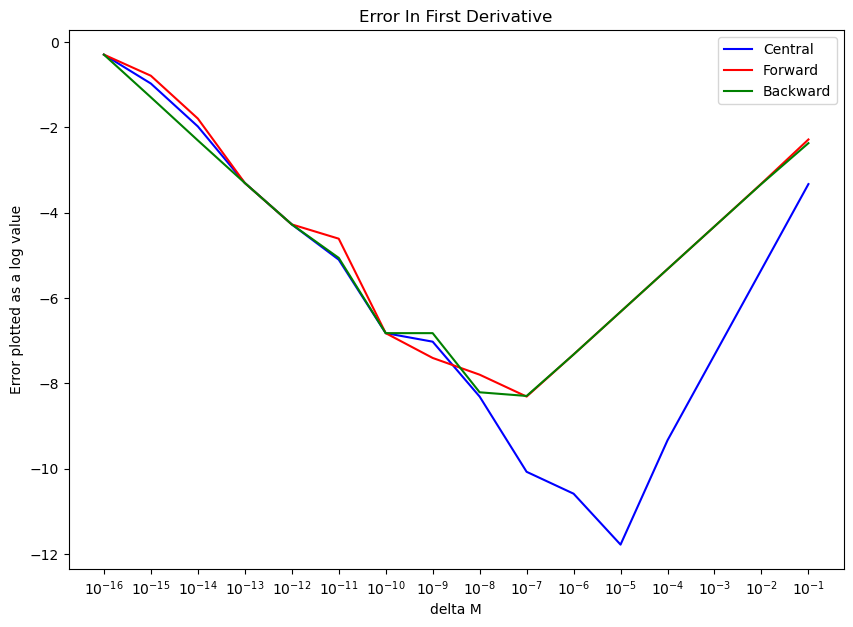

In [10]:
# plotting
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(h, cent1, '-b' , label = 'Central')
ax.plot(h, for11, '-r' , label = 'Forward')
ax.plot(h, bac11, '-g' , label = 'Backward')
ax.set_xscale('log')
ax.set_xticks(h)
ax.set_xlabel('delta M')
ax.set_ylabel('Error plotted as a log value')
ax.set_title('Error In First Derivative')
ax.legend()

plt.show()

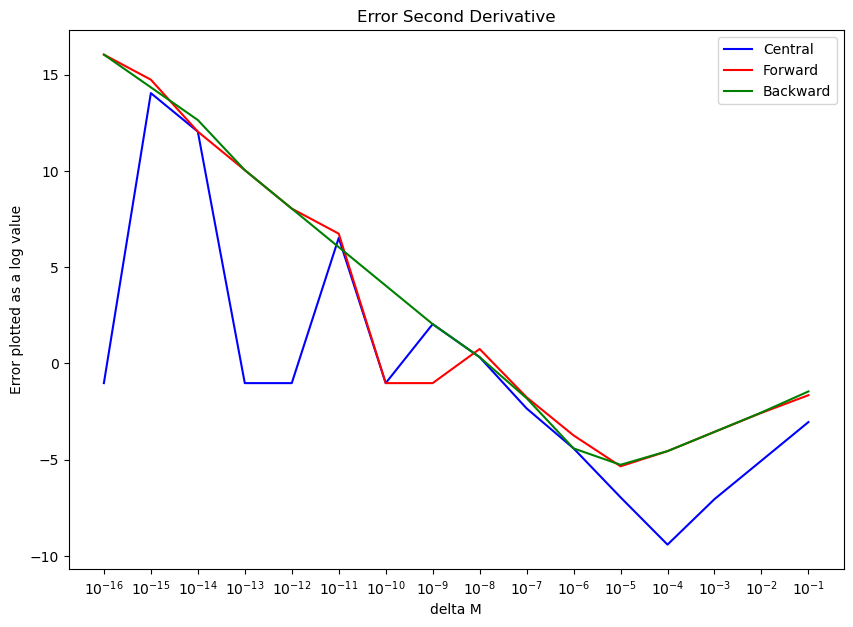

In [11]:
# plotting
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(h, cent2, '-b' , label = 'Central')
ax.plot(h, for12, '-r' , label = 'Forward')
ax.plot(h, bac12, '-g' , label = 'Backward')
ax.set_xscale('log')
ax.set_xticks(h)
ax.set_xlabel('delta M')
ax.set_ylabel('Error plotted as a log value')
ax.set_title('Error Second Derivative')
ax.legend()

plt.show()

The values for $\Delta$ M are specified below:

| Id | Difference Type            | $\Delta$ M |
|--- | -------------------------- | ---------- |
| 01 | Central First Derivative   |   1e-5     |
| 02 | Forward First Derivative   |   1e-7     |
| 03 | Backward First Derivative  |   1e-7     |
| 04 | Central Second Derivative  |   1e-4     |
| 05 | Forward Second Derivative  |   1e-5     |
| 06 | Backward Second Derivative |   1e-5     |

Central Method gives the most accurate value for both first and second derivative and it gives those values at 1e-4 for second derivative and 1e-5 for first derivative. 

We got these values from the graph above, as the lowest value that we got from the graph are the most accurate results of the differences method. It clearly gives massive errors of the scale of 1e15 when a $\Delta$ M of 1e-15 is taken for the second derivative tests. But at points 1e-5, we get error of the order 1e-5, which is a good estimate for our purposes, it is not the most accurate results, but decent enough to use them in computing values for difficult derivatives. 